# use of API's 

In [58]:
from pycoingecko import CoinGeckoAPI
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import plotly

In [29]:
cg=CoinGeckoAPI()
bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin',vs_currency='inr',days=30)
bitcoin_data.keys()

dict_keys(['prices', 'market_caps', 'total_volumes'])

In [30]:
data=pd.DataFrame(bitcoin_data['prices'],columns=['TimeStamp','Price'])
data

,TimeStamp,Price
0,1710777951877,5.582074e+06
1,1710781634488,5.546910e+06
2,1710785020118,5.589984e+06
3,1710788769252,5.559199e+06
4,1710792388682,5.560321e+06
...,...,...
716,1713355664566,5.250531e+06
717,1713358891044,5.214475e+06
718,1713362600532,5.237458e+06
719,1713366253232,5.123829e+06


In [32]:
data['date']=pd.to_datetime(data['TimeStamp'],unit='ms')
data['date']

0     2024-03-18 16:05:51.877
1     2024-03-18 17:07:14.488
2     2024-03-18 18:03:40.118
3     2024-03-18 19:06:09.252
4     2024-03-18 20:06:28.682
                ...          
716   2024-04-17 12:07:44.566
717   2024-04-17 13:01:31.044
718   2024-04-17 14:03:20.532
719   2024-04-17 15:04:13.232
720   2024-04-17 15:59:10.000
Name: date, Length: 721, dtype: datetime64[ns]

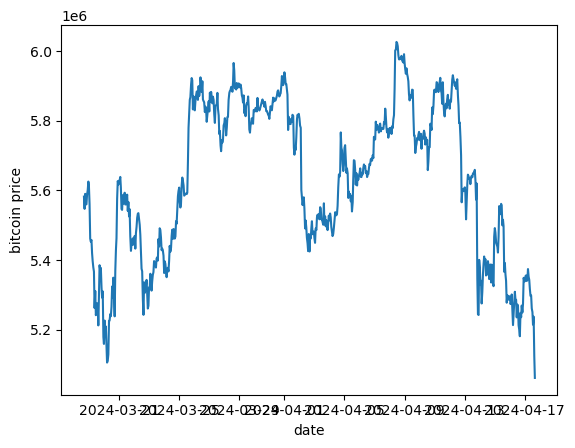

In [33]:
plt.plot(data['TimeStamp'],data['Price'])
plt.xlabel('date')
plt.ylabel('bitcoin price')
plt.show()

In [50]:
candlestick_data=data.groupby(data.date.dt.date).agg({'Price':['min','max','first','last']})

In [74]:
fig=go.Figure(data=[go.Candlestick(
    x=candlestick_data.index,
    open=candlestick_data['Price']['first'],
    high=candlestick_data['Price']['max'],
    low=candlestick_data['Price']['min'],
    close=candlestick_data['Price']['last']
                                )
                   ])
fig.update_layout(
    xaxis_rangeslider_visible=False,
    xaxis_title='Date',
    yaxis_title='Price (INR)',
    title='Bitcoin Candlestick chart over past 30 Days',
    
)
plotly.offline.plot(fig,filename='./bitcoin_candlestick_graph.html',auto_open=False)

'./bitcoin_candlestick_graph.html'

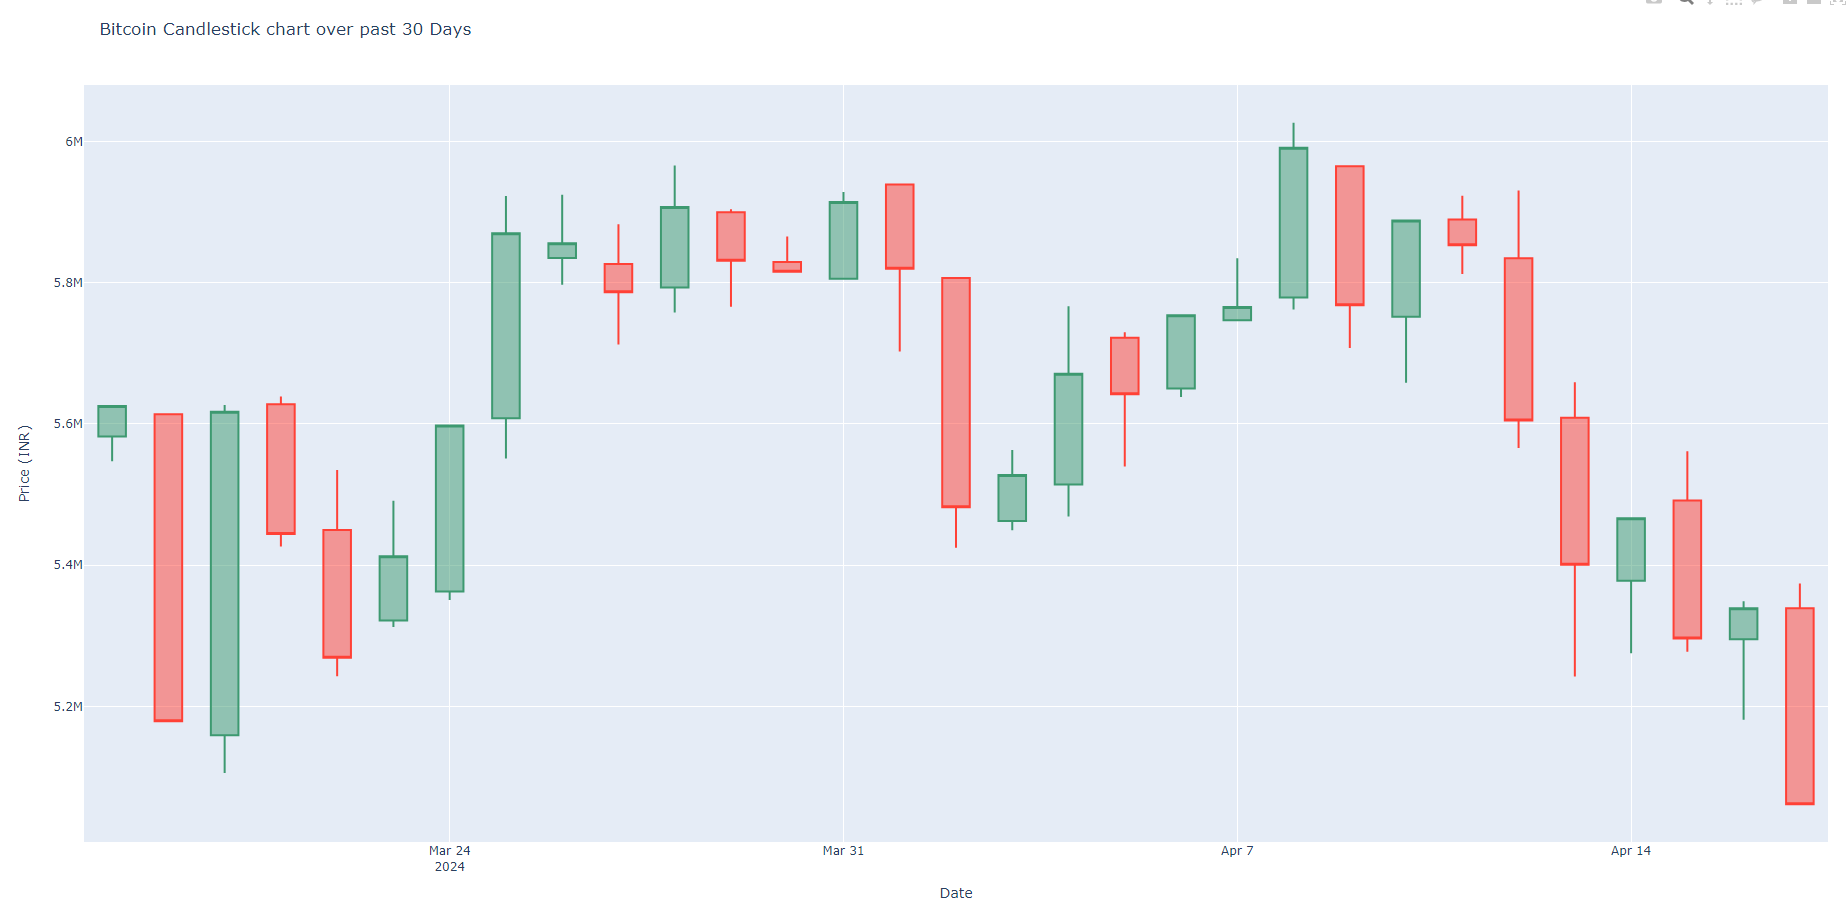

# REST API

In [76]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

In [77]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

In [78]:
nba_teams = teams.get_teams()

In [80]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [81]:
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [82]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [83]:
id_warriors=df_warriors[['id']].values[0][0]
# we now have an integer that can be used to request the Warriors information 
id_warriors

1610612744

In [84]:
from nba_api.stats.endpoints import leaguegamefinder

In [86]:
file_name = "datasets/Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


In [87]:
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

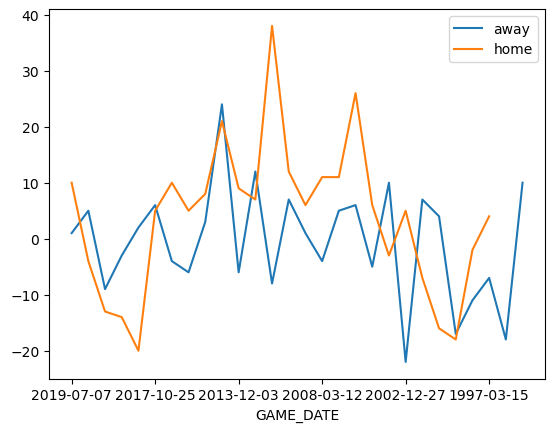

In [88]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()